In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('bike_datset_hour.csv')

In [3]:
data.head()

instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0        1  01-01-2011     1.0  0.0   1.0  0.0        0      6.0           0   
1        2  01-01-2011     1.0  0.0   1.0  1.0        0      6.0           0   
2        3  01-01-2011     1.0  0.0   1.0  2.0        0      6.0           0   
3        4  01-01-2011     1.0  0.0   1.0  3.0        0      6.0           0   
4        5  01-01-2011     1.0  0.0   1.0  4.0        0      6.0           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0     3.0        13.0   16  
1           1  0.22  0.2727  0.80        0.0     8.0        32.0   40  
2           1  0.22  0.2727  0.80        0.0     5.0        27.0   32  
3           1  0.24  0.2879  0.75        0.0     3.0        10.0   13  
4           1  0.24  0.2879  0.75        0.0     0.0         1.0    1

In [4]:
data

instant      dteday  season   yr  mnth    hr  holiday  weekday  \
0            1  01-01-2011     1.0  0.0   1.0   0.0        0      6.0   
1            2  01-01-2011     1.0  0.0   1.0   1.0        0      6.0   
2            3  01-01-2011     1.0  0.0   1.0   2.0        0      6.0   
3            4  01-01-2011     1.0  0.0   1.0   3.0        0      6.0   
4            5  01-01-2011     1.0  0.0   1.0   4.0        0      6.0   
...        ...         ...     ...  ...   ...   ...      ...      ...   
17374    17375  31-12-2012     NaN  1.0  12.0  19.0        0      1.0   
17375    17376  31-12-2012     1.0  1.0  12.0  20.0        0      1.0   
17376    17377  31-12-2012     1.0  1.0  12.0  21.0        0      1.0   
17377    17378  31-12-2012     1.0  1.0  12.0  22.0        0      1.0   
17378    17379  31-12-2012     1.0  1.0  12.0  23.0        0      1.0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000     3.0   
1               0           1  0.22  0.2727  0.80     0.0000     8.0   
2               0           1  0.22  0.2727  0.80     0.0000     5.0   
3               0           1  0.24  0.2879  0.75     0.0000     3.0   
4               0           1  0.24  0.2879  0.75     0.0000     0.0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642    11.0   
17375           1           2  0.26  0.2576  0.60     0.1642     8.0   
17376           1           1  0.26  0.2576  0.60     0.1642     7.0   
17377           1           1  0.26  0.2727  0.56     0.1343    13.0   
17378           1           1  0.26     NaN  0.65        NaN    12.0   

       registered  cnt  
0            13.0   16  
1            32.0   40  
2            27.0   32  
3            10.0   13  
4             1.0    1  
...           ...  ...  
17374       108.0  119  
17375        81.0   89  
17376        83.0   90  
17377        48.0   61  
17378        37.0   49  

[17379 rows x 17 columns]

In [5]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17377.000000  17378.000000  17378.000000  17378.000000   
mean    8690.0000      2.501813      0.502532      6.537461     11.546438   
std     5017.0295      1.106865      0.500008      3.438625      6.914480   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday      weekday    workingday    weathersit          temp  \
count  17379.000000  17378.00000  17379.000000  17379.000000  17378.000000   
mean       0.028770      3.00351      0.682721      1.425283      0.496992   
std        0.167165      2.00570      0.465431      0.639357      0.192561   
min        0.000000      0.00000      0.000000      1.000000      0.020000   
25%        0.000000      1.00000      0.000000      1.000000      0.340000   
50%        0.000000      3.00000      1.000000      1.000000      0.500000   
75%        0.000000      5.00000      1.000000      2.000000      0.660000   
max        1.000000      6.00000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17377.000000  17379.000000  17378.000000  17378.000000  17378.000000   
mean       0.475799      0.627229      0.190101     35.673208    153.789849   
std        0.171845      0.192930      0.122343     49.304851    151.361131   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [8]:
data.shape

(17379, 17)

In [9]:
data.dtypes

instant         int64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday         int64
weekday       float64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt             int64
dtype: object

In [10]:
data.size

295443

In [7]:
data.isnull().sum()

instant       0
dteday        0
season        2
yr            1
mnth          1
hr            1
holiday       0
weekday       1
workingday    0
weathersit    0
temp          1
atemp         2
hum           0
windspeed     1
casual        1
registered    1
cnt           0
dtype: int64

In [12]:
data.count()

instant       17379
dteday        17379
season        17377
yr            17378
mnth          17378
hr            17378
holiday       17379
weekday       17378
workingday    17379
weathersit    17379
temp          17378
atemp         17377
hum           17379
windspeed     17378
casual        17378
registered    17378
cnt           17379
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17377 non-null  float64
 3   yr          17378 non-null  float64
 4   mnth        17378 non-null  float64
 5   hr          17378 non-null  float64
 6   holiday     17379 non-null  int64  
 7   weekday     17378 non-null  float64
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17378 non-null  float64
 11  atemp       17377 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17378 non-null  float64
 14  casual      17378 non-null  float64
 15  registered  17378 non-null  float64
 16  cnt         17379 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 2.3+ MB


In [14]:
data==0

instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False   True  False   True     True    False   
1        False   False   False   True  False  False     True    False   
2        False   False   False   True  False  False     True    False   
3        False   False   False   True  False  False     True    False   
4        False   False   False   True  False  False     True    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False     True    False   
17375    False   False   False  False  False  False     True    False   
17376    False   False   False  False  False  False     True    False   
17377    False   False   False  False  False  False     True    False   
17378    False   False   False  False  False  False     True    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0            True       False  False  False  False       True   False   
1            True       False  False  False  False       True   False   
2            True       False  False  False  False       True   False   
3            True       False  False  False  False       True   False   
4            True       False  False  False  False       True    True   
...           ...         ...    ...    ...    ...        ...     ...   
17374       False       False  False  False  False      False   False   
17375       False       False  False  False  False      False   False   
17376       False       False  False  False  False      False   False   
17377       False       False  False  False  False      False   False   
17378       False       False  False  False  False      False   False   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
17374       False  False  
17375       False  False  
17376       False  False  
17377       False  False  
17378       False  False  

[17379 rows x 17 columns]

In [15]:
(data==0).sum()

instant           0
dteday            0
season            0
yr             8645
mnth              0
hr              726
holiday       16879
weekday        2502
workingday     5514
weathersit        0
temp              0
atemp             2
hum              22
windspeed      2180
casual         1581
registered       24
cnt               0
dtype: int64

In [16]:
data.iloc[0:100,:]

instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0         1  01-01-2011     1.0  0.0   1.0  0.0        0      6.0           0   
1         2  01-01-2011     1.0  0.0   1.0  1.0        0      6.0           0   
2         3  01-01-2011     1.0  0.0   1.0  2.0        0      6.0           0   
3         4  01-01-2011     1.0  0.0   1.0  3.0        0      6.0           0   
4         5  01-01-2011     1.0  0.0   1.0  4.0        0      6.0           0   
..      ...         ...     ...  ...   ...  ...      ...      ...         ...   
95       96  05-01-2011     1.0  0.0   1.0  4.0        0      3.0           1   
96       97  05-01-2011     1.0  0.0   1.0  5.0        0      3.0           1   
97       98  05-01-2011     1.0  0.0   1.0  6.0        0      3.0           1   
98       99  05-01-2011     1.0  0.0   1.0  7.0        0      3.0           1   
99      100  05-01-2011     1.0  0.0   1.0  8.0        0      3.0           1   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0            1  0.24  0.2879  0.81     0.0000     3.0        13.0   16  
1            1  0.22  0.2727  0.80     0.0000     8.0        32.0   40  
2            1  0.22  0.2727  0.80     0.0000     5.0        27.0   32  
3            1  0.24  0.2879  0.75     0.0000     3.0        10.0   13  
4            1  0.24  0.2879  0.75     0.0000     0.0         1.0    1  
..         ...   ...     ...   ...        ...     ...         ...  ...  
95           1  0.24  0.2273  0.48     0.2239     0.0         2.0    2  
96           1  0.22  0.2273  0.47     0.1642     0.0         3.0    3  
97           1  0.20  0.1970  0.47     0.2239     0.0        33.0   33  
98           1  0.18  0.1818  0.43     0.1940     1.0        87.0   88  
99           1  0.20  0.1818  0.40     0.2985     3.0       192.0  195  

[100 rows x 17 columns]

In [19]:
datacol=pd.DataFrame(data,columns=['instant','dteday','weathersit','temp','windspeed'])
datacol

instant      dteday  weathersit  temp  windspeed
0            1  01-01-2011           1  0.24     0.0000
1            2  01-01-2011           1  0.22     0.0000
2            3  01-01-2011           1  0.22     0.0000
3            4  01-01-2011           1  0.24     0.0000
4            5  01-01-2011           1  0.24     0.0000
...        ...         ...         ...   ...        ...
17374    17375  31-12-2012           2  0.26     0.1642
17375    17376  31-12-2012           2  0.26     0.1642
17376    17377  31-12-2012           1  0.26     0.1642
17377    17378  31-12-2012           1  0.26     0.1343
17378    17379  31-12-2012           1  0.26        NaN

[17379 rows x 5 columns]

In [28]:
data3=data[(data['weekday']==0) & (data['weathersit']==3)]
data3

instant      dteday  season   yr  mnth    hr  holiday  weekday  \
29          30  02-01-2011     1.0  0.0   1.0   6.0        0      0.0   
31          32  02-01-2011     1.0  0.0   1.0   8.0        0      0.0   
37          38  02-01-2011     1.0  0.0   1.0  14.0        0      0.0   
38          39  02-01-2011     1.0  0.0   1.0  15.0        0      0.0   
39          40  02-01-2011     1.0  0.0   1.0  16.0        0      0.0   
...        ...         ...     ...  ...   ...   ...      ...      ...   
16849    16850  09-12-2012     4.0  1.0  12.0  20.0        0      0.0   
16851    16852  09-12-2012     4.0  1.0  12.0  22.0        0      0.0   
16852    16853  09-12-2012     4.0  1.0  12.0  23.0        0      0.0   
16998    16999  16-12-2012     4.0  1.0  12.0   1.0        0      0.0   
17015    17016  16-12-2012     4.0  1.0  12.0  18.0        0      0.0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
29              0           3  0.42  0.4242  0.77     0.2985     0.0   
31              0           3  0.40  0.4091  0.71     0.2239     0.0   
37              0           3  0.36  0.3485  0.76     0.1940     4.0   
38              0           3  0.34  0.3333  0.81     0.1642    19.0   
39              0           3  0.34  0.3333  0.71     0.1642     9.0   
...           ...         ...   ...     ...   ...        ...     ...   
16849           0           3  0.36  0.3636  1.00     0.0896     6.0   
16851           0           3  0.36  0.3636  0.93     0.1045     3.0   
16852           0           3  0.36  0.3636  1.00     0.0896     3.0   
16998           0           3  0.34  0.3485  0.76     0.1045    14.0   
17015           0           3  0.38  0.3939  0.82     0.1045     8.0   

       registered  cnt  
29            2.0    2  
31            8.0    8  
37           55.0   59  
38           55.0   74  
39           67.0   76  
...           ...  ...  
16849       102.0  108  
16851        75.0   78  
16852        48.0   51  
16998        82.0   96  
17015        99.0  107  

[169 rows x 17 columns]

In [29]:
data4=data.iloc[10:150]
data5=data4[data4['weathersit']>0.24]
data5

instant      dteday  season   yr  mnth    hr  holiday  weekday  \
10        11  01-01-2011     1.0  0.0   1.0  10.0        0      6.0   
11        12  01-01-2011     1.0  0.0   1.0  11.0        0      6.0   
12        13  01-01-2011     1.0  0.0   1.0  12.0        0      6.0   
13        14  01-01-2011     1.0  0.0   1.0  13.0        0      6.0   
14        15  01-01-2011     1.0  0.0   1.0  14.0        0      6.0   
..       ...         ...     ...  ...   ...   ...      ...      ...   
145      146  07-01-2011     1.0  0.0   1.0   8.0        0      5.0   
146      147  07-01-2011     1.0  0.0   1.0   9.0        0      5.0   
147      148  07-01-2011     1.0  0.0   1.0  10.0        0      5.0   
148      149  07-01-2011     1.0  0.0   1.0  11.0        0      5.0   
149      150  07-01-2011     1.0  0.0   1.0  12.0        0      5.0   

     workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10            0           1  0.38  0.3939  0.76     0.2537    12.0   
11            0           1  0.36  0.3333  0.81     0.2836    26.0   
12            0           1  0.42  0.4242  0.77     0.2836    29.0   
13            0           2  0.46  0.4545  0.72     0.2985    47.0   
14            0           2  0.46  0.4545  0.72     0.2836    35.0   
..          ...         ...   ...     ...   ...        ...     ...   
145           1           1  0.20  0.1970  0.51     0.2537    20.0   
146           1           1  0.20  0.1818  0.47     0.2985     9.0   
147           1           1  0.22  0.1970  0.37     0.3284    16.0   
148           1           2  0.20  0.1970  0.40     0.2239    19.0   
149           1           2  0.20  0.1970  0.37     0.2537     9.0   

     registered  cnt  
10         24.0   36  
11         30.0   56  
12         55.0   84  
13         47.0   94  
14         71.0  106  
..          ...  ...  
145       190.0  210  
146       125.0  134  
147        47.0   63  
148        48.0   67  
149        50.0   59  

[140 rows x 17 columns]

In [33]:
datatemp=pd.DataFrame(data,columns=['temp'])
datamean=datatemp.fillna(datatemp.mean())
datamean

temp
0      0.24
1      0.22
2      0.22
3      0.24
4      0.24
...     ...
17374  0.26
17375  0.26
17376  0.26
17377  0.26
17378  0.26

[17379 rows x 1 columns]

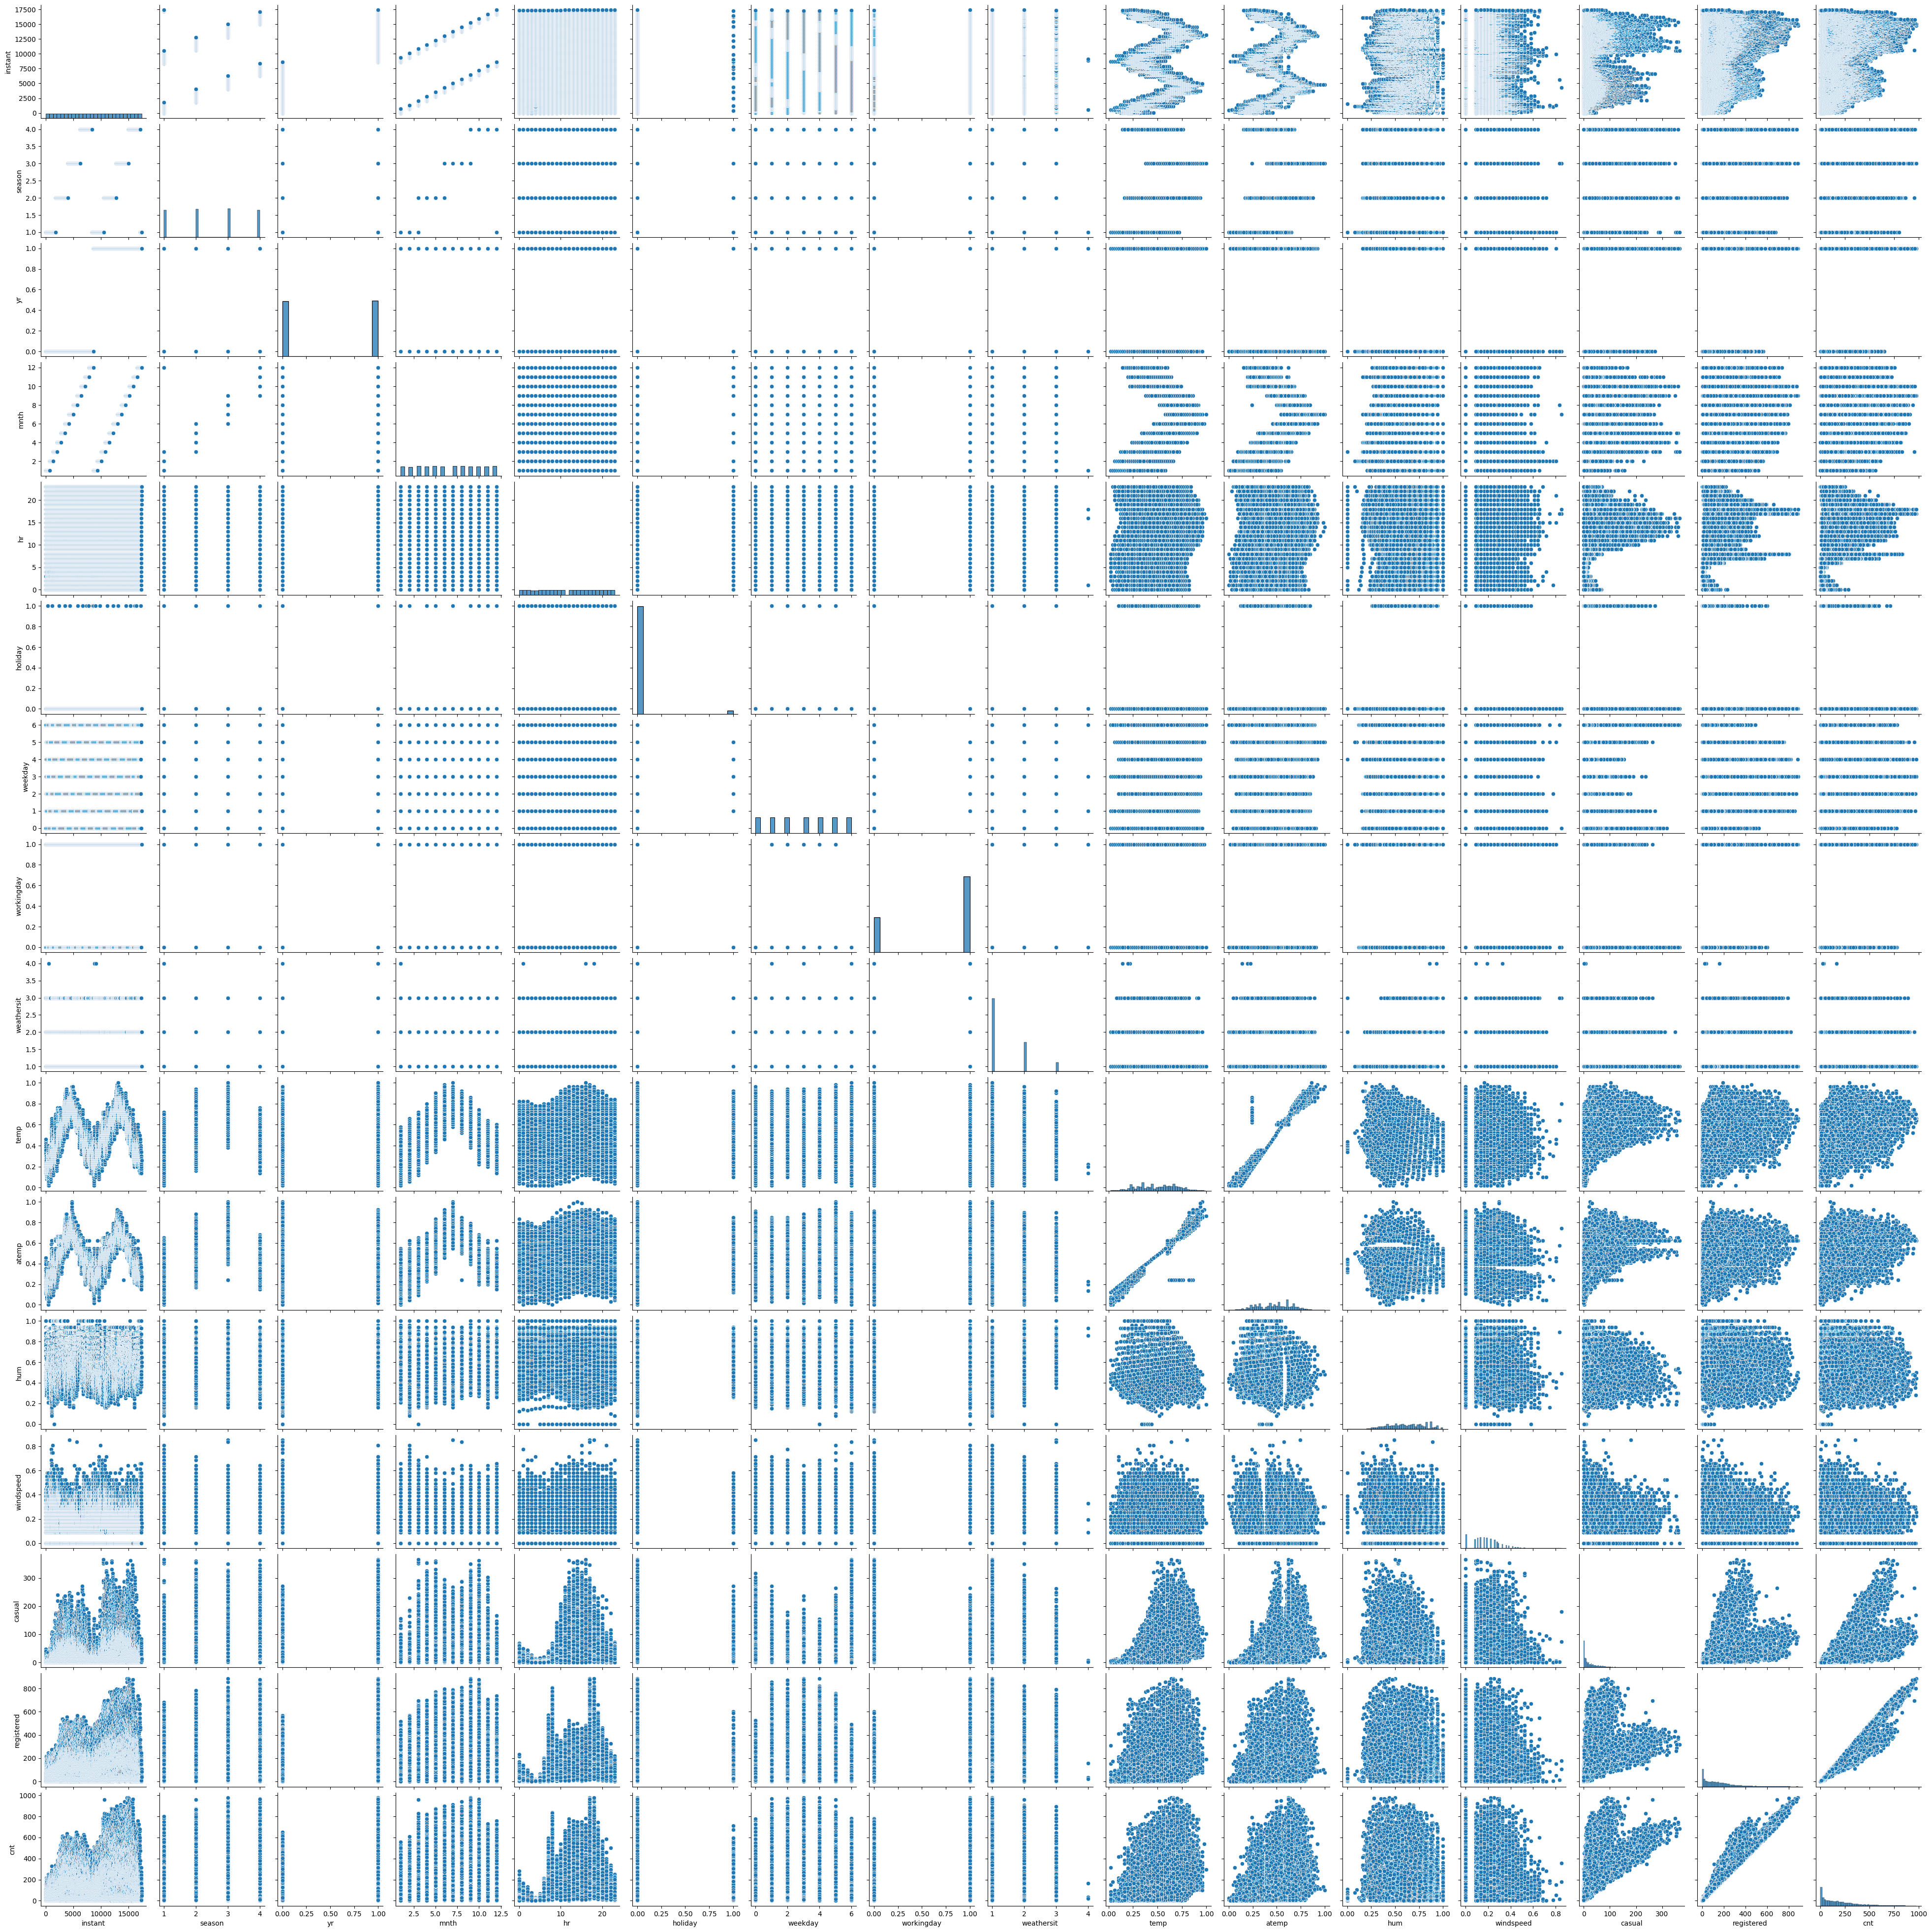

In [34]:
sns.pairplot(data)